In [1]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import math
from collections import Counter
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
filepath = r"d:\User\Desktop\GT\jupyter\Diabetes\diabetes.csv"

df = pd.read_csv(filepath)

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df['Outcome'].value_counts() 

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df['Outcome'].value_counts()/float(len(df)) # Viewing percentage distribution of outcomes

Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

In [8]:
df.info() # Summary of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
round(df.describe(),2) # Checking to see if there are outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Looking above: Glucose, BloodPressure, SkinThickness, Insulin, BMI, all cannot be 0 and hence replace them with NaN and use Imputation.

In [11]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_impute] = df[cols_to_impute].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[cols_to_impute]=imputer.fit_transform(df[cols_to_impute])
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.44,12.10,8.79,85.02,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.20,29.15,155.55,32.40,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,155.55,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [14]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
X = df.drop(columns='Outcome')
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89.0,62.0,29.15342,155.548223,22.500000,0.142,33
127,1,118.0,58.0,36.00000,94.000000,33.300000,0.261,23
564,0,91.0,80.0,29.15342,155.548223,32.400000,0.601,27
375,12,140.0,82.0,43.00000,325.000000,39.200000,0.528,58
663,9,145.0,80.0,46.00000,130.000000,37.900000,0.637,40
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.900000,0.171,63
192,7,159.0,66.0,29.15342,155.548223,30.400000,0.383,36
629,4,94.0,65.0,22.00000,155.548223,24.700000,0.148,21
559,11,85.0,74.0,29.15342,155.548223,30.100000,0.300,35


In [29]:
colum = X_train.columns

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train, columns=[colum])
X_test = pd.DataFrame(X_test, columns=[colum])

In [32]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02
mean,7.709882e-18,-3.207311e-16,2.097088e-16,-1.603655e-16,-4.780127e-17,-5.551115e-16,1.511137e-16,-1.819532e-16
std,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00
min,-1.122041e+00,-2.199292e+00,-3.612873e+00,-2.496653e+00,-1.653788e+00,-2.073136e+00,-1.175970e+00,-1.049231e+00
25%,-8.298639e-01,-7.331260e-01,-7.446172e-01,-4.883293e-01,-4.287364e-01,-7.254220e-01,-6.941921e-01,-7.990833e-01
50%,-2.455099e-01,-1.166700e-01,-3.555201e-02,-2.491764e-02,-1.790233e-02,-2.898856e-02,-2.891975e-01,-3.821703e-01
75%,6.310212e-01,6.330737e-01,6.051502e-01,4.042589e-01,-1.790233e-02,5.936177e-01,4.274472e-01,6.184210e-01
max,3.844968e+00,2.532425e+00,4.148290e+00,7.768111e+00,7.961711e+00,4.937846e+00,5.876055e+00,3.953725e+00


# Logistic Regression

**Scratch**

In [38]:
def logisregress(x,y,w,b,lr,iterations):
    m,n=x.shape
    cost=[]
    for i in range(iterations):
        z=np.dot(x,w)+b
        fx = 1/(1 + np.exp(-z))
        loss = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
        dw = np.dot(x.T,(fx-y))/m
        db = np.mean(fx-y)
        w = w - lr*dw
        b = b - lr*db
        cos = cost_calc(x,y,w,b,fx)
        cost.append(cos)
    fx = (fx>=0.5).astype(int)
    return w,b,cost,fx

In [39]:
def cost_calc(x,y,w,b,fx):
    cost = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
    return cost

Weight calculated: [ 0.28743639  1.01141359 -0.12803198 -0.00856715  0.00243936  0.61556673
  0.26824883  0.24016953]
Bias calculated: -0.7648969477054915


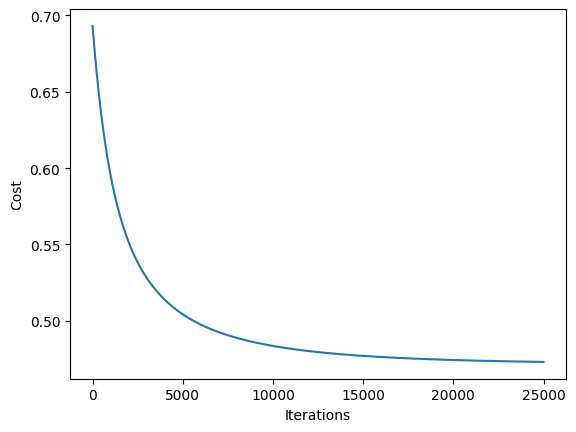

Accuracy: 0.796875
Precision: 0.7674418604651163
Recall: 0.532258064516129
F1 Score: 0.6285714285714286
Confusion Matrix: 
 [[120  10]
 [ 29  33]]


In [41]:
def main():
    lr = 0.001
    iterations = 25000
    
    w = np.zeros(X_train.shape[1])
    b = 0

    w, b, cost, train_preds = logisregress(X_train, y_train, w, b, lr, iterations)

    print(f"Weight calculated: {w}")
    print(f"Bias calculated: {b}")
    
    plt.plot(range(iterations),cost)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

    z_test = np.dot(X_test, w) + b
    fx_test = 1 / (1 + np.exp(-z_test))
    y_pred_test = (fx_test >= 0.55).astype(int)
    
    print("Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Precision:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1 Score:", f1_score(y_test, y_pred_test))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test))
    
main()

**Scikit Learn**

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Sklearn evaluation: \n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Sklearn evaluation: 

Accuracy: 0.7864583333333334
Precision: 0.723404255319149
Recall: 0.5483870967741935
F1 Score: 0.6238532110091743
Confusion Matrix:
 [[117  13]
 [ 28  34]]


# Decision trees

**Scratch**

In [45]:
def entropy(y):
    counts = Counter(y)
    total = len(y)
    ent = 0
    for label in counts:
        p = counts[label] / total
        ent -= p * math.log2(p)
    return ent

def information_gain(parent_y, left_y, right_y):
    p = len(left_y) / len(parent_y)
    return entropy(parent_y) - (p * entropy(left_y) + (1 - p) * entropy(right_y))

In [46]:
def best_split(X, y):
    best_gain = -float('inf')
    best_feature = None
    best_threshold = None

    n_features = len(X[0])

    for feature_idx in range(n_features):
        values = sorted(set([x[feature_idx] for x in X]))
        if len(values) < 2:
            continue
        thresholds = [(values[i] + values[i+1]) / 2 for i in range(len(values) - 1)]

        for t in thresholds:
            left_y = [y[i] for i in range(len(X)) if X[i][feature_idx] <= t]
            right_y = [y[i] for i in range(len(X)) if X[i][feature_idx] > t]

            if not left_y or not right_y:
                continue

            gain = information_gain(y, left_y, right_y)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_idx
                best_threshold = t

    return best_feature, best_threshold


In [47]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature          
        self.threshold = threshold      
        self.left = left                
        self.right = right              
        self.value = value              

    def is_leaf(self):
        return self.value is not None

In [48]:
def build_tree(X, y, depth=0, max_depth=5):
    if len(set(y)) == 1:
        return Node(value=y[0])

    if depth >= max_depth or len(X) == 0:
        majority = Counter(y).most_common(1)[0][0]
        return Node(value=majority)

    best_feature, threshold = best_split(X, y)
    if threshold is None or best_feature is None:
        majority = Counter(y).most_common(1)[0][0]
        return Node(value=majority)

    left_idx = [i for i in range(len(X)) if X[i][best_feature] <= threshold]
    right_idx = [i for i in range(len(X)) if X[i][best_feature] > threshold]

    left_X = [X[i] for i in left_idx]
    right_X = [X[i] for i in right_idx]
    left_y = [y[i] for i in left_idx]
    right_y = [y[i] for i in right_idx]

    left_node = build_tree(left_X, left_y, depth + 1, max_depth)
    right_node = build_tree(right_X, right_y, depth + 1, max_depth)

    return Node(feature=best_feature, threshold=threshold, left=left_node, right=right_node)


In [49]:
def predict(node, x):
    if node.is_leaf():
        return node.value
    if x[node.feature] <= node.threshold:
        return predict(node.left, x)
    else:
        return predict(node.right, x)

In [50]:
def get_mae(max_leaf,trainx,trainy,testx,testy):
    model1 = DecisionTreeRegressor(max_leaf_nodes=max_leaf,random_state=0)
    model1.fit(trainx,trainy)
    predict = model1.predict(testx)
    mae = mean_absolute_error(testy,predict)
    return mae

In [51]:
def Evaluation_Function(X_train,X_test,y_train,y_test,y_pred_test,y_pred_test2):
    print("Scratch Evaluation matrices: ")
    print("Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Precision:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1 Score:", f1_score(y_test, y_pred_test))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test))

    clf = DecisionTreeRegressor()
    clf.fit(X_train,y_train)    
    clfpred = clf.predict(X_test)
    print("\nScikit Learn Evaluation matrices: ")
    print("SL Accuracy:", accuracy_score(y_test, clfpred))
    print("SL Precision:", precision_score(y_test, clfpred))
    print("SL Recall:", recall_score(y_test, clfpred))
    print("SL F1:", f1_score(y_test, clfpred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, clfpred))
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    print("\nRandom Forest Evaluation matrices: ")
    print("RF Accuracy:", accuracy_score(y_test, y_pred))
    print("RF Precision:", precision_score(y_test, y_pred))
    print("RF Recall:", recall_score(y_test, y_pred))
    print("RF F1:", f1_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    model = XGBClassifier()
    model.fit(X_train,y_train)
    y_pred2= model.predict(X_test)
    print("\nXGBoost Evaluation matrices: ")
    print("XG Accuracy:", accuracy_score(y_test, y_pred2))
    print("XG Precision:", precision_score(y_test, y_pred2))
    print("XG Recall:", recall_score(y_test, y_pred2))
    print("XG F1:", f1_score(y_test, y_pred2))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))
    print("\n")
    leaf_nodes_values = [2,5,10,20,25,26,27,28,29,30,31,32,33,34,35,40,50,70,80,90,100] #Used 2 step tuning strategy : Tested with basic inputs and then fine tuned
    l={}
    
    for i in leaf_nodes_values:
        results = get_mae(i,X_train,y_train,X_test,y_test)
        print(f"MAE for {i}th leaf node is {results}")
        l[i]=results
    bestresult = min(l,key=l.get)
    print(f"\n\nBest Depth found at {bestresult} with value {l[bestresult]}")
    return l,bestresult

In [55]:
X1 = np.array(X)
y1 = np.array(y)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

tree2 = build_tree(X1_train,y1_train,max_depth=5)

y_pred_test = [predict(tree2, x) for x in X1_test]
y_pred_test2 = [predict(tree2, x) for x in X1_train]

l,bestresult = Evaluation_Function(X1_train,X1_test,y1_train,y1_test,y_pred_test,y_pred_test2)

final_model=DecisionTreeRegressor(max_leaf_nodes=bestresult,random_state=0)
final_model.fit(X1,y1)

Scratch Evaluation matrices: 
Accuracy: 0.7142857142857143
Precision: 0.5714285714285714
Recall: 0.8
F1 Score: 0.6666666666666666
Confusion Matrix: 
 [[66 33]
 [11 44]]

Scikit Learn Evaluation matrices: 
SL Accuracy: 0.7012987012987013
SL Precision: 0.5789473684210527
SL Recall: 0.6
SL F1: 0.5892857142857143
Confusion Matrix: 
 [[75 24]
 [22 33]]

Random Forest Evaluation matrices: 
RF Accuracy: 0.7532467532467533
RF Precision: 0.6545454545454545
RF Recall: 0.6545454545454545
RF F1: 0.6545454545454545
Confusion Matrix: 
 [[80 19]
 [19 36]]

XGBoost Evaluation matrices: 
XG Accuracy: 0.7337662337662337
XG Precision: 0.609375
XG Recall: 0.7090909090909091
XG F1: 0.6554621848739496
Confusion Matrix: 
 [[74 25]
 [16 39]]


MAE for 2th leaf node is 0.3722294074972647
MAE for 5th leaf node is 0.33521765776069934
MAE for 10th leaf node is 0.3152985814410463
MAE for 20th leaf node is 0.294054267062335
MAE for 25th leaf node is 0.2851686191392539
MAE for 26th leaf node is 0.2801181140887489
MA

DecisionTreeRegressor(max_leaf_nodes=31, random_state=0)

# Support Vector Machines

In [33]:
svc = SVC()
svc.fit(X_train,y_train)
ypredict = svc.predict(X_test)
print('Model score with default hyperparameters:\n ')
print("Accuracy:", accuracy_score(y_test, ypredict))
print("Precision:", precision_score(y_test, ypredict))
print("Recall:", recall_score(y_test, ypredict))
print("F1 Score:", f1_score(y_test, ypredict))
print("Confusion Matrix: \n", confusion_matrix(y_test, ypredict))

Model score with default hyperparameters:
 
Accuracy: 0.765625
Precision: 0.6888888888888889
Recall: 0.5
F1 Score: 0.5794392523364486
Confusion Matrix: 
 [[116  14]
 [ 31  31]]


**Using Linear Kernel Method**

In [34]:
linear_svc = SVC(kernel='linear', C=1.0) # c=1 will set a balanced tolerance for misclassified examples
linear_svc.fit(X_train,y_train)
ypredicti = linear_svc.predict(X_test)
print('Model score with Linear SVM method :\n ')
print("Accuracy:", accuracy_score(y_test, ypredicti))
print("Precision:", precision_score(y_test, ypredicti))
print("Recall:", recall_score(y_test, ypredicti))
print("F1 Score:", f1_score(y_test, ypredicti))
print("Confusion Matrix: \n", confusion_matrix(y_test, ypredicti))

Model score with Linear SVM method :
 
Accuracy: 0.78125
Precision: 0.717391304347826
Recall: 0.532258064516129
F1 Score: 0.6111111111111112
Confusion Matrix: 
 [[117  13]
 [ 29  33]]


In [35]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train))) #Checking for Overfitting or Underfitting
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7639
Test set score: 0.7812


Both are quite Comparable so no problem

**Using Polynomial Kernel Method**

In [36]:
poly_svc = SVC(kernel='poly', C=1.0) # c=1 will set a balanced tolerance for misclassified examples
poly_svc.fit(X_train,y_train)
ypredic = poly_svc.predict(X_test)
print('Model score with Polynomial SVM method :\n ')
print("Accuracy:", accuracy_score(y_test, ypredic))
print("Precision:", precision_score(y_test, ypredic))
print("Recall:", recall_score(y_test, ypredic))
print("F1 Score:", f1_score(y_test, ypredic))
print("Confusion Matrix: \n", confusion_matrix(y_test, ypredic))

Model score with Polynomial SVM method :
 
Accuracy: 0.71875
Precision: 0.625
Recall: 0.3225806451612903
F1 Score: 0.425531914893617
Confusion Matrix: 
 [[118  12]
 [ 42  20]]


In [37]:
print('Training set score: {:.4f}'.format(poly_svc.score(X_train, y_train))) #Checking for Overfitting or Underfitting
print('Test set score: {:.4f}'.format(poly_svc.score(X_test, y_test)))

Training set score: 0.7986
Test set score: 0.7188


Hence we get to know that the Polynomial Kernel method is overfitting the Data.